<a href="https://colab.research.google.com/github/khalilullahalfaath/Automatic-Speech-Recognition/blob/main/Automatic_Speech_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from glob import glob
from pathlib import Path
import os


import librosa
import librosa.display
import IPython.display as ipd
import soundfile as sf
import scipy.signal as signal

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns


from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Baca folder yang sudah displit
path = '/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan'

# List the contents of the shared folder
try:
    audio_files = os.listdir(path)
    print(f"Contents of {path}:")
    print(audio_files)

    # simpan sebagai array
    try:
        audio_files = glob(os.path.join(path, '**', '*.wav'), recursive=True)
    except Exception as e:
        print(f"Error: {e}")

    for item in audio_files:
        print(item)
except FileNotFoundError:
    print(f"Error: The folder '{path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")


Contents of /content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan:
['Maju', 'Mundur', 'Berhenti', 'Kiri', 'Kanan']
/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Maju/Asfa_seg_14.wav
/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Maju/Asfa_seg_15.wav
/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Maju/Asfa_seg_10.wav
/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Maju/Asfa_seg_1.wav
/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Maju/Asfa_seg_7.wav
/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Maju/Faridun_seg_

In [4]:
print(len(audio_files))

122


In [5]:
# Contoh rekaman
ipd.Audio(audio_files[0])

In [6]:
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [0.00714111 0.00732422 0.00747681 0.00759888 0.00765991 0.00765991
 0.00762939 0.00756836 0.00741577 0.00717163]
shape y: (26112,)
sr: 22050


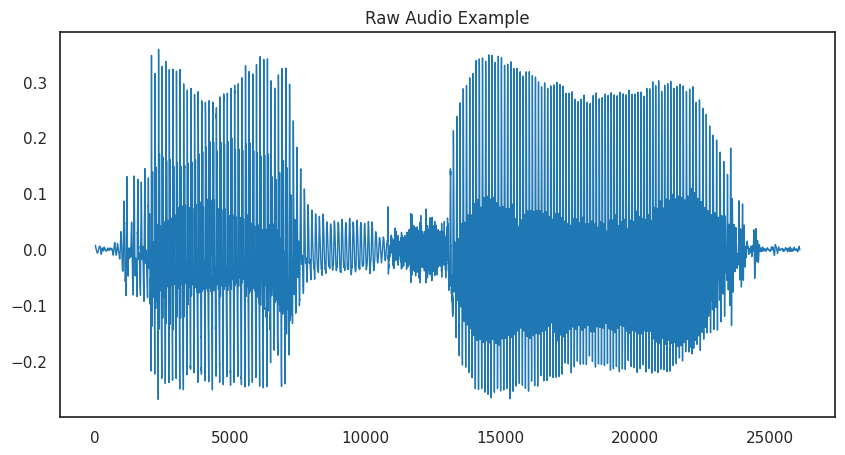

In [7]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

# Preprocessing

In [8]:
# Noice reduction (filtering)
# Low-pass filtering

def butter_lowpass(cutoff, fs, order=5):
    return signal.butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

filtered_y = butter_lowpass_filter(y, cutoff=4000, fs=sr, order=5)

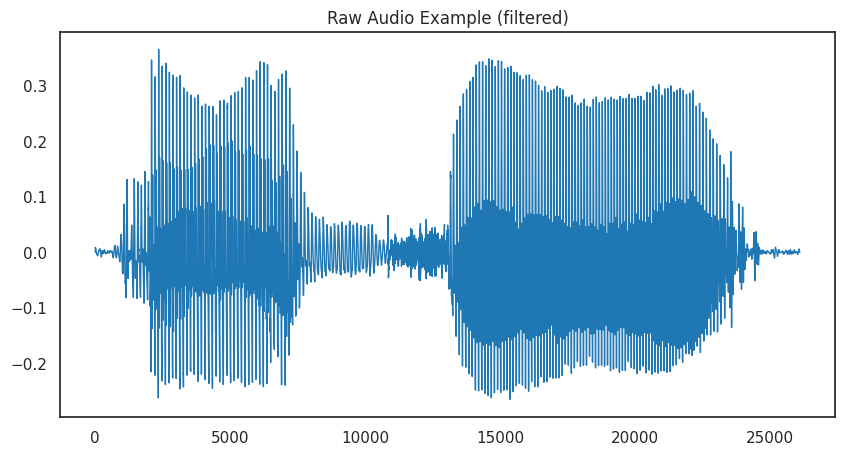

In [9]:
pd.Series(filtered_y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example (filtered)',
                 color=color_pal[0])
plt.show()

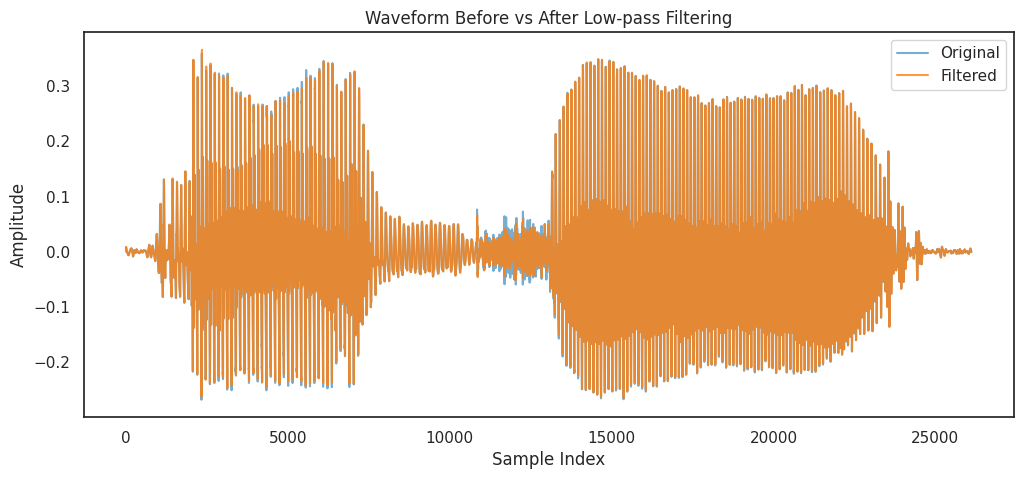

In [10]:
plt.figure(figsize=(12, 5))
plt.plot(y, label='Original', alpha=0.6)
plt.plot(filtered_y, label='Filtered', alpha=0.8)
plt.legend()
plt.title('Waveform Before vs After Low-pass Filtering')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()


In [11]:
from IPython.display import Audio

print("Original:")
display(Audio(y, rate=sr))

print("Filtered:")
display(Audio(filtered_y, rate=sr))


Original:


Filtered:


In [12]:
# Normalisasi
# Amplitudo

normalized_y = librosa.util.normalize(y, norm=np.inf)
normalized_filtered_y = librosa.util.normalize(filtered_y, norm=np.inf)

print("Original and Normalized:")
display(Audio(normalized_y, rate=sr))

print("Normalized Filtered:")
display(Audio(normalized_filtered_y, rate=sr))

Original and Normalized:


Normalized Filtered:


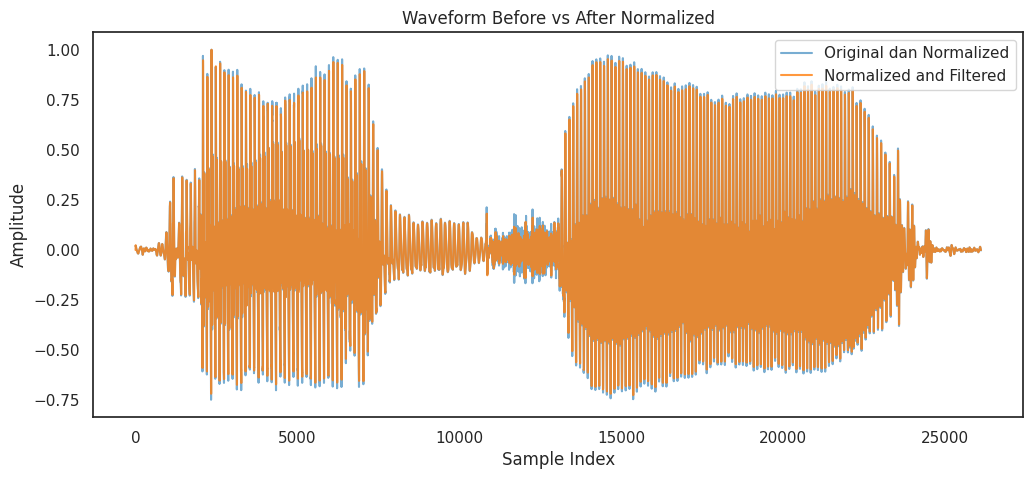

In [13]:
plt.figure(figsize=(12, 5))
plt.plot(normalized_y, label='Original dan Normalized', alpha=0.6)
plt.plot(normalized_filtered_y, label='Normalized and Filtered', alpha=0.8)
plt.legend()
plt.title('Waveform Before vs After Normalized')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

In [14]:
# Cek time length of each audio

for audio_data in audio_files:
    duration = librosa.get_duration(filename=audio_data)
    print(f"Duration of {audio_data}: {duration} seconds")

/tmp/ipython-input-1611690043.py:4: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  duration = librosa.get_duration(filename=audio_data)


Duration of /content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Maju/Asfa_seg_14.wav: 1.18421768707483 seconds
Duration of /content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Maju/Asfa_seg_15.wav: 1.3003174603174603 seconds
Duration of /content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Maju/Asfa_seg_10.wav: 1.509297052154195 seconds
Duration of /content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Maju/Asfa_seg_1.wav: 1.7414965986394557 seconds
Duration of /content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Maju/Asfa_seg_7.wav: 1.230657596371882 seconds
Duration of /content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah 

/tmp/ipython-input-1611690043.py:4: FutureWarning: PySoundFile failed. Trying audioread instead.
	Audioread support is deprecated in librosa 0.10.0 and will be removed in version 1.0.
  duration = librosa.get_duration(filename=audio_data)


Duration of /content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Kiri/Reza (1)_seg_37 (1).wav: 1.2 seconds


/tmp/ipython-input-1611690043.py:4: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  duration = librosa.get_duration(filename=audio_data)
/tmp/ipython-input-1611690043.py:4: FutureWarning: PySoundFile failed. Trying audioread instead.
	Audioread support is deprecated in librosa 0.10.0 and will be removed in version 1.0.
  duration = librosa.get_duration(filename=audio_data)
/tmp/ipython-input-1611690043.py:4: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  duration = librosa.get_duration(filename=audio_data)


Duration of /content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Kiri/Reza (1)_seg_37.wav: 1.2 seconds


/tmp/ipython-input-1611690043.py:4: FutureWarning: PySoundFile failed. Trying audioread instead.
	Audioread support is deprecated in librosa 0.10.0 and will be removed in version 1.0.
  duration = librosa.get_duration(filename=audio_data)
/tmp/ipython-input-1611690043.py:4: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  duration = librosa.get_duration(filename=audio_data)


Duration of /content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Kiri/Reza (1)_seg_35.wav: 0.7 seconds
Duration of /content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Kiri/Reza (1)_seg_34.wav: 1.0448979591836736 seconds


/tmp/ipython-input-1611690043.py:4: FutureWarning: PySoundFile failed. Trying audioread instead.
	Audioread support is deprecated in librosa 0.10.0 and will be removed in version 1.0.
  duration = librosa.get_duration(filename=audio_data)
/tmp/ipython-input-1611690043.py:4: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  duration = librosa.get_duration(filename=audio_data)


Duration of /content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Kiri/Reza (1)_seg_36.wav: 1.1 seconds
Duration of /content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Kanan/Asfa_seg_61.wav: 1.6021768707482993 seconds
Duration of /content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Kanan/Asfa_seg_56.wav: 1.6718367346938776 seconds
Duration of /content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Kanan/Asfa_seg_59.wav: 1.6253968253968254 seconds
Duration of /content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Kanan/Asfa_seg_52.wav: 1.8808163265306121 seconds
Duration of /content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah t

/tmp/ipython-input-1611690043.py:4: FutureWarning: PySoundFile failed. Trying audioread instead.
	Audioread support is deprecated in librosa 0.10.0 and will be removed in version 1.0.
  duration = librosa.get_duration(filename=audio_data)
/tmp/ipython-input-1611690043.py:4: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  duration = librosa.get_duration(filename=audio_data)


Duration of /content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Kanan/Reza (1)_seg_39 (1).wav: 1.1 seconds
Duration of /content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Kanan/Reza (1)_seg_40.wav: 0.9752380952380952 seconds
Duration of /content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Kanan/Reza (1)_seg_37.wav: 0.905578231292517 seconds


/tmp/ipython-input-1611690043.py:4: FutureWarning: PySoundFile failed. Trying audioread instead.
	Audioread support is deprecated in librosa 0.10.0 and will be removed in version 1.0.
  duration = librosa.get_duration(filename=audio_data)
/tmp/ipython-input-1611690043.py:4: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  duration = librosa.get_duration(filename=audio_data)


Duration of /content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Kanan/Reza (1)_seg_38.wav: 1.3 seconds
Duration of /content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Kanan/Reza (1)_seg_39.wav: 0.905578231292517 seconds


# Pre-processing Pipeline

In [15]:
# Resampling, convert to mono, normalisasi amplitudo

y, sr = librosa.load(audio_files[0], sr=16000, mono=True)
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [0.00581533 0.00781544 0.00729686 0.00787868 0.00746678 0.00773232
 0.00722258 0.00711279 0.00648145 0.00614774]
shape y: (18948,)
sr: 16000


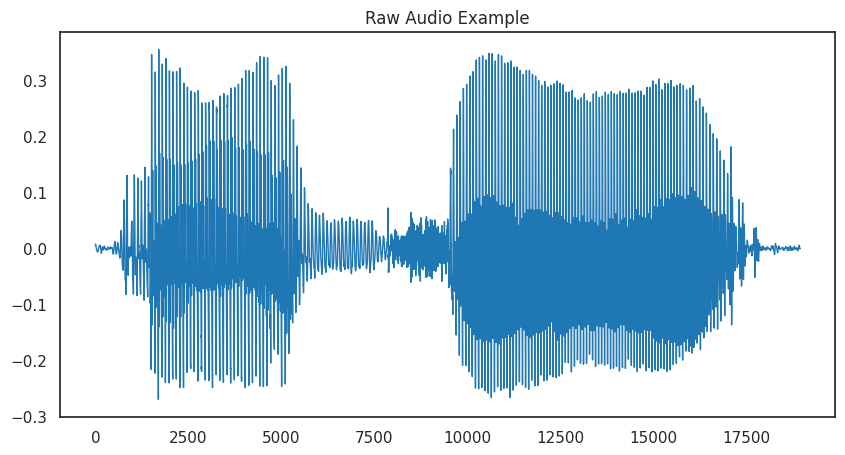

In [16]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

In [17]:
normalized_y = librosa.util.normalize(y, norm=np.inf)

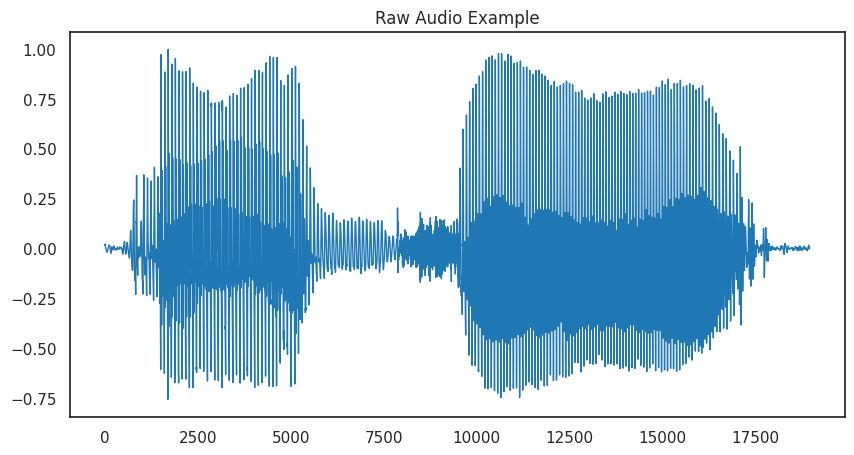

In [18]:
pd.Series(normalized_y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

In [19]:
# Full pipeline Preprocessing

class Preprocessor:
    def __init__(self, sr=16000, mono=True):
        self.sr = sr
        self.mono = mono

        self.cutoff = 4000

    def load_audio(self, audio_path):
        try:
            y, sr = librosa.load(audio_path, sr=self.sr, mono=self.mono) # sampling rate ke 16khz dan set ke mono
            return y, sr
        except:
            print("Gagal mengimport audio")

    def lowpass_filter(self, y, sr):
        nyquist_freq = sr / 2
        normalized_cutoff = self.cutoff / nyquist_freq
        b, a = signal.butter(5, normalized_cutoff, btype='low', analog=False)
        filtered_y = signal.filtfilt(b, a, y)
        return filtered_y

    def normalize(self, y):
        return librosa.util.normalize(y, norm=np.inf)

    def apply_preprocessing(self, audio_path):
        y, sr = self.load_audio(audio_path)
        y_filtered = self.lowpass_filter(y, sr)
        y_normalized = self.normalize(y_filtered)
        return y_normalized, sr

preprocessor = Preprocessor()
y_preprocessed, sr = preprocessor.apply_preprocessing(audio_files[0])


In [20]:
print(y_preprocessed)

[ 1.60928784e-02  2.00976614e-02  2.16493038e-02 ... -3.16023968e-04
 -7.32551501e-04  3.74852178e-07]


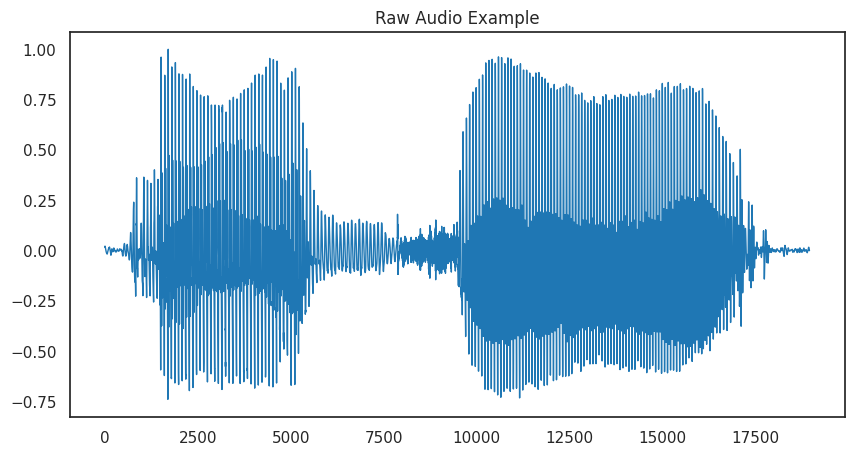

In [21]:
pd.Series(y_preprocessed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

# MFCC

In [22]:
# Pre-emphasis
normalized_y = np.append(normalized_y[0], normalized_y[1:] - 0.97 * normalized_y[:-1])

mfcc = librosa.feature.mfcc(
    y=normalized_y, sr=sr,
    n_mfcc=13,       # jumlah koefisien (umum: 12–13)
    n_fft=512,       # panjang FFT per frame
    hop_length=160,  # jarak antar frame (~10 ms kalau sr=16k)
    n_mels=40,       # jumlah filter Mel
    fmin=0, fmax=sr/2
)

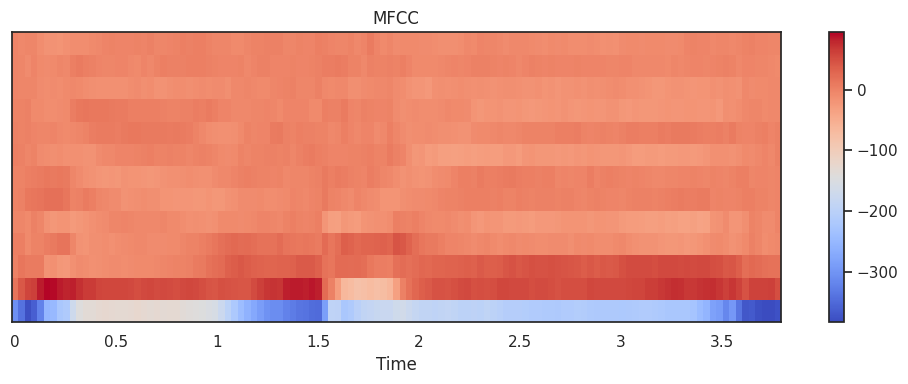

In [23]:
import librosa.display

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time', sr=sr)
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [24]:
mfcc.shape

(13, 119)

In [25]:
class FeatureExtractor:
  def __init__(self, mode="aggregate"):
    self.n_mfcc = 13
    self.n_mfft = 512
    self.hop_length = 160
    self.n_mels = 40
    self.fmin = 0

    self.mode = mode


  def preemphasis(self):
    return np.append(self.y[0], self.y[1:] - 0.97 * self.y[:-1])

  def extract_mfcc(self, y, sr):
    self.y = y
    self.sr = sr

    self.fmax = self.sr/2

    # panggil preemphasis
    y_prep = self.preemphasis()
    mfcc = librosa.feature.mfcc(
        y=y_prep, sr=self.sr,
        n_mfcc=self.n_mfcc,       # jumlah koefisien
        n_fft=self.n_mfft,       # panjang FFT per frame
        hop_length=self.hop_length,  # jarak antar frame (~10 ms kalau sr=16k)
        n_mels=self.n_mels,       # jumlah filter Mel
        fmin=self.fmin, fmax= self.fmax)

    if self.mode == "aggregate":
      # Ambil rata-rata dan std untuk digabungkan jadi fitur
      mfcc_mean = np.mean(mfcc, axis=1)
      mfcc_std = np.std(mfcc, axis=1)

      # Gabungkan mean dan std jadi satu vektor
      features = np.concatenate((mfcc_mean, mfcc_std))
    elif self.mode == "frame":
      # transpose
      features = mfcc.T
    else:
      raise ValueError("Mode tidak didukung. Harus antara aggregate atau frame")
    return features



In [26]:
feature_extractor_agg = FeatureExtractor(mode="aggregate")
mfcc = feature_extractor_agg.extract_mfcc(y_preprocessed, sr)

In [27]:
mfcc.shape

(26,)

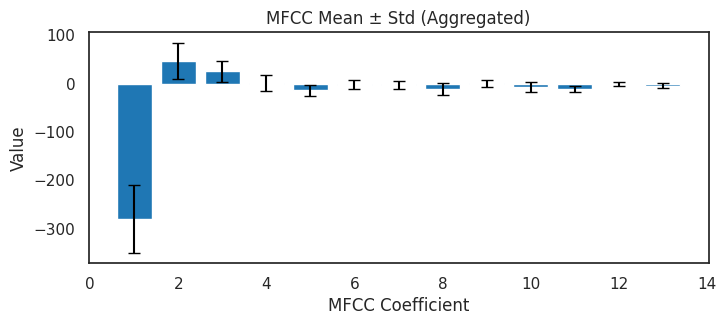

In [28]:
features = feature_extractor_agg.extract_mfcc(y, sr)

mfcc_mean = features[:13]
mfcc_std = features[13:]

plt.figure(figsize=(8, 3))
plt.bar(np.arange(1, 14), mfcc_mean, yerr=mfcc_std, capsize=4)
plt.xlabel("MFCC Coefficient")
plt.ylabel("Value")
plt.title("MFCC Mean ± Std (Aggregated)")
plt.show()


# Buat dataset

In [29]:
# # Baca folder yang sudah displit
# path = '/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan'

# # List the contents of the shared folder
# try:
#     audio_files = os.listdir(path)
#     print(f"Contents of {path}:")
#     print(audio_files)

#     # simpan sebagai array
#     try:
#         audio_files = glob(os.path.join(path, '**', '*.wav'), recursive=True)
#     except Exception as e:
#         print(f"Error: {e}")

#     for item in audio_files:
#         print(item)
# except FileNotFoundError:
#     print(f"Error: The folder '{path}' was not found.")
# except Exception as e:
#     print(f"An error occurred: {e}")

## Dataset dalam bentuk vektor berukuran sama

In [30]:
import os

def build_dataset(base_path, preprocessor, extractor):
    X, y = [], []
    label_map = {}

    for idx, label in enumerate(sorted(os.listdir(base_path))):
        folder = os.path.join(base_path, label)
        if not os.path.isdir(folder):
            continue

        label_map[label] = idx
        files = glob(os.path.join(folder, '*.wav'))

        for f in files:
            print(f)
            try:
                y_preprocessed, sr = preprocessor.apply_preprocessing(f)
                features = extractor.extract_mfcc(y_preprocessed, sr)
                X.append(features)
                y.append(idx)
            except Exception as e:
                print(f"Error processing {f}: {e}")

    return np.array(X), np.array(y), label_map

BASE_PATH = '/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan'

preprocessor = Preprocessor()
extractor_agg = FeatureExtractor(mode="aggregate")

X, y, label_map = build_dataset(BASE_PATH, preprocessor, extractor_agg)

print("Dataset selesai dibuat")
print(f"Total data: {len(X)}")
print(f"Feature shape: {X.shape}")
print(f"Labels: {label_map}")


/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Berhenti/Asfa_seg_31.wav
/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Berhenti/Asfa_seg_24.wav
/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Berhenti/Asfa_seg_30.wav
/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Berhenti/Faridun_seg_12.wav
/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Berhenti/Faridun_seg_15.wav
/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Berhenti/Faridun_seg_14.wav
/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Berhenti/Faridun_seg_1

/tmp/ipython-input-4058809110.py:12: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=self.sr, mono=self.mono) # sampling rate ke 16khz dan set ke mono
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-4058809110.py:12: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=self.sr, mono=self.mono) # sampling rate ke 16khz dan set ke mono
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Kanan/Reza (1)_seg_40.wav
/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Kanan/Reza (1)_seg_37.wav
/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Kanan/Reza (1)_seg_38.wav
/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Kanan/Reza (1)_seg_39.wav
/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Kiri/Asfa_seg_43.wav
/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Kiri/Asfa_seg_42.wav
/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Kiri/Asfa_seg_38.wav
/content/drive

/tmp/ipython-input-4058809110.py:12: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=self.sr, mono=self.mono) # sampling rate ke 16khz dan set ke mono
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-4058809110.py:12: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=self.sr, mono=self.mono) # sampling rate ke 16khz dan set ke mono
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Kiri/Reza (1)_seg_35.wav
/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Kiri/Reza (1)_seg_34.wav
/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Kiri/Reza (1)_seg_36.wav


/tmp/ipython-input-4058809110.py:12: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=self.sr, mono=self.mono) # sampling rate ke 16khz dan set ke mono
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-4058809110.py:12: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=self.sr, mono=self.mono) # sampling rate ke 16khz dan set ke mono
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Maju/Asfa_seg_14.wav
/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Maju/Asfa_seg_15.wav
/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Maju/Asfa_seg_10.wav
/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Maju/Asfa_seg_1.wav
/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Maju/Asfa_seg_7.wav
/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Maju/Faridun_seg_5.wav
/content/drive/MyDrive/Kuliah/S-2 Universitas Gadjah Mada/Semester 1/RFPP/Tugas 2/Rekaman Tugas 2/Sudah terkumpulkan/Maju/Faridun_seg_6.wav
/content/drive/MyDrive/Kuliah/S-

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.92
[[5 0 0 0 0]
 [0 5 0 0 0]
 [0 0 5 0 0]
 [0 0 1 4 0]
 [1 0 0 0 4]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      1.00      1.00         5
           2       0.83      1.00      0.91         5
           3       1.00      0.80      0.89         5
           4       1.00      0.80      0.89         5

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv=3)
print(scores.mean())

0.5729674796747969


In [48]:
# SVM
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.92
[[5 0 0 0 0]
 [0 5 0 0 0]
 [0 0 5 0 0]
 [1 0 0 4 0]
 [0 0 0 1 4]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       0.80      0.80      0.80         5
           4       1.00      0.80      0.89         5

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm, X, y, cv=3)
print(scores.mean())

0.45


In [50]:
from scipy.spatial.distance import cdist
import numpy as np

def compute_class_templates(X, y):
    templates = {}
    for label in np.unique(y):
        templates[label] = np.mean(X[y == label], axis=0)
    return templates

def predict_template_matching(X_test, templates, metric="cosine"):
    dists = {label: np.mean(cdist(X_test, [tmpl], metric=metric)) for label, tmpl in templates.items()}
    return min(dists, key=dists.get)  # label dengan jarak terkecil


In [37]:
from google.colab import files
import librosa

uploaded = files.upload()

audio_path_input = list(uploaded.keys())[0]

# Load audio input
# y_input, sr_input = librosa.load(audio_path_input, sr=16000, mono=True)

# Preprocess audio input
y_input, sr_input = preprocessor.apply_preprocessing(audio_path_input)
print(f"Loaded: {audio_path_input}, length={len(y_input)/sr_input:.2f}s, sr_input={sr_input}")

Saving test (kiri).m4a to test (kiri).m4a
Loaded: test (kiri).m4a, length=2.11s, sr_input=16000


/tmp/ipython-input-4058809110.py:12: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=self.sr, mono=self.mono) # sampling rate ke 16khz dan set ke mono
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


## Template matching

In [38]:
def build_template_bank(base_path, preprocessor, extractor):
    bank = []
    label_map = {}

    for idx, label in enumerate(sorted(os.listdir(base_path))):
        folder = os.path.join(base_path, label)
        if not os.path.isdir(folder):
            continue

        label_map[label] = idx
        files = glob(os.path.join(folder, '*.wav'))

        for f in files:
            try:
                y_preprocessed, sr = preprocessor.apply_preprocessing(f)
                mfcc = extractor.extract_mfcc(y_preprocessed, sr)
                bank.append({
                    "label": label,
                    "path": f,
                    "mfcc": mfcc
                })
            except Exception as e:
                print(f"Error processing {f}: {e}")

    return bank, label_map

def predict_template_matching_input(mfcc_input, bank):
    best_label = None
    best_score = -1
    results = []

    for entry in bank:
        # Cosine similarity antara input dengan tiap template
        sim = np.dot(mfcc_input, entry["mfcc"]) / (np.linalg.norm(mfcc_input) * np.linalg.norm(entry["mfcc"]))
        results.append((entry["label"], sim, entry["path"]))

        if sim > best_score:
            best_label = entry["label"]
            best_score = sim

    # Urutkan semua hasil berdasarkan kemiripan tertinggi
    results.sort(key=lambda x: x[1], reverse=True)
    return best_label, results

extractor_template = FeatureExtractor(mode="aggregate")

# Bangun bank template
bank, label_map = build_template_bank(BASE_PATH, preprocessor, extractor_template)

# Preprocessing + ekstraksi MFCC
y_input, sr_input = preprocessor.apply_preprocessing(audio_path_input)
mfcc_input = extractor_template.extract_mfcc(y_input, sr_input)

# Prediksi
pred_label, ranked = predict_template_matching_input(mfcc_input, bank)
print("Prediksi:", pred_label)
print("\nTop-3 match:")
for label, sim, path in ranked[:3]:
    print(f"{label} | similarity={sim:.3f} | {os.path.basename(path)}")


/tmp/ipython-input-4058809110.py:12: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=self.sr, mono=self.mono) # sampling rate ke 16khz dan set ke mono
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-4058809110.py:12: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=self.sr, mono=self.mono) # sampling rate ke 16khz dan set ke mono
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-4058809110.py:12: UserWarning: PySoundFile 

Prediksi: Kiri

Top-3 match:
Kiri | similarity=0.988 | Reza (1)_seg_34.wav
Kiri | similarity=0.986 | Reza (1)_seg_37 (1).wav
Kiri | similarity=0.985 | Reza (1)_seg_36.wav


/tmp/ipython-input-4058809110.py:12: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=self.sr, mono=self.mono) # sampling rate ke 16khz dan set ke mono
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


## Frame-based dengan DTW

In [40]:
extractor_frame = FeatureExtractor(mode="frame")

mfcc_input = extractor_frame.extract_mfcc(y_input, sr_input)

In [44]:
def build_frame_template_bank(base_path, preprocessor, extractor):
    bank = []
    label_map = {}

    for idx, label in enumerate(sorted(os.listdir(base_path))):
        folder = os.path.join(base_path, label)
        if not os.path.isdir(folder):
            continue

        label_map[label] = idx
        files = glob(os.path.join(folder, '*.wav'))

        for f in files:
            try:
                y_preprocessed, sr = preprocessor.apply_preprocessing(f)
                mfcc = extractor.extract_mfcc(y_preprocessed, sr)  # shape: n_mfcc × n_frames
                bank.append({
                    "label": label,
                    "path": f,
                    "mfcc": mfcc
                })
            except Exception as e:
                print(f"Error processing {f}: {e}")

    return bank, label_map


In [51]:
from librosa.sequence import dtw
import numpy as np

def dtw_distance(mfcc1, mfcc2):
    # pastikan shape [frames × features]
    mfcc1_T = mfcc1.T
    mfcc2_T = mfcc2.T

    # semua harus finite
    mfcc1_T = np.nan_to_num(mfcc1_T)
    mfcc2_T = np.nan_to_num(mfcc2_T)

    D, wp = dtw(mfcc1_T, mfcc2_T, metric='cosine')
    return D[-1, -1]


In [46]:
def predict_dtw_template_matching(mfcc_input, bank):
    best_label = None
    best_score = float('inf')  # cost paling kecil
    results = []

    for entry in bank:
        cost = dtw_distance(mfcc_input, entry["mfcc"])
        results.append((entry["label"], cost, entry["path"]))

        if cost < best_score:
            best_label, best_score = entry["label"], cost

    # Urutkan semua hasil berdasarkan cost terkecil
    results.sort(key=lambda x: x[1])
    return best_label, results


In [52]:
# Build template bank frame-based
bank_frame, label_map = build_frame_template_bank(BASE_PATH, preprocessor, extractor_frame)

mfcc_input = extractor_frame.extract_mfcc(y_input, sr_input)

# Prediksi
pred_label, ranked = predict_frame_template_matching(mfcc_input, bank_frame)
print("Prediksi frame-based:", pred_label)
print("\nTop-3 match:")
for label, sim, path in ranked[:3]:
    print(f"{label} | similarity={sim:.3f} | {os.path.basename(path)}")


/tmp/ipython-input-4058809110.py:12: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=self.sr, mono=self.mono) # sampling rate ke 16khz dan set ke mono
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-4058809110.py:12: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=self.sr, mono=self.mono) # sampling rate ke 16khz dan set ke mono
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-4058809110.py:12: UserWarning: PySoundFile 

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 212 while Y.shape[1] == 124